In [1]:
#importing necessary libraries
import tensorflow as tf
from tensorflow import keras


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [3]:
#import dataset and split into train and test data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
#to see length of training dataset
len(x_train)

60000

##to see length of testing dataset
len(x_test)

In [6]:
#shape of training dataset  60,000 images having 28*28 size
x_train.shape

(60000, 28, 28)

In [7]:
#shape of testing dataset  10,000 images having 28*28 size
x_test.shape

(10000, 28, 28)

In [8]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

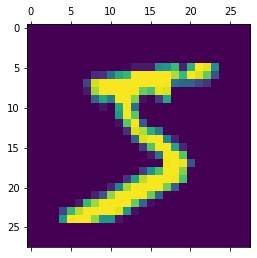

In [9]:
#to see how first image look
plt.matshow(x_train[0])

In [10]:
#normalize the images by scaling pixel intensities to the range 0,1

x_train = x_train / 255
x_test = x_test / 255

In [11]:
x_train[0]


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [13]:
# Model
inputs = keras.layers.Input(shape=(28, 28))                      #(?, 28, 28)
l = keras.layers.Flatten()(inputs)                               #(?, 784)
l = keras.layers.Dense(512, activation=tf.nn.relu)(l)            #(?, 512)
outputs = keras.layers.Dense(10, activation=tf.nn.softmax)(l)    #(?, 10) -> (?, 1)

# New Section

In [14]:
model = tf.keras.models.Model(inputs, outputs)


In [15]:
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer="adam",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])
model.fit(x_train, y_train, epochs=5)
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {0} - Test Acc: {1}".format(test_loss, test_acc))

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2024 - accuracy: 0.9408
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0800 - accuracy: 0.9758
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0522 - accuracy: 0.9837
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0361 - accuracy: 0.9887
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0641 - accuracy: 0.9808
Test Loss: 0.06414167582988739 - Test Acc: 0.9807999730110168


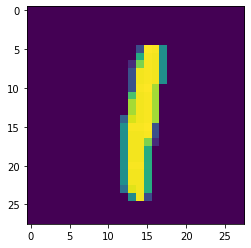

In [17]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

In [18]:
#we use predict() on new data
predicted_value=model.predict(x_test)
print("Handwritten number in the image is= %d" %np.argmax(predicted_value[n]))

Handwritten number in the image is= 1


In [20]:
history=model.fit(x_train, y_train,validation_data=(x_test,y_test),epochs=10)


Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0068 - accuracy: 0.9979 - val_loss: 0.1072 - val_accuracy: 0.9795
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0076 - accuracy: 0.9974 - val_loss: 0.0943 - val_accuracy: 0.9837
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0050 - accuracy: 0.9981 - val_loss: 0.1073 - val_accuracy: 0.9812
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0068 - accuracy: 0.9979 - val_loss: 0.1087 - val_accuracy: 0.9827
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0066 - accuracy: 0.9980 - val_loss: 0.1229 - val_accuracy: 0.9800
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0051 - accuracy: 0.9982 - val_loss: 0.1205 - val_accuracy: 0.9792
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0070 - accuracy: 0.9980 - val_loss: 0.1172 - val_accuracy:

In [21]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1308 - accuracy: 0.9807
Loss=0.131
Accuracy=0.981


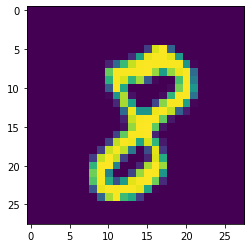

In [22]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

In [23]:
#we use predict() on new data
predicted_value=model.predict(x_test)
print("Handwritten number in the image is= %d" %np.argmax(predicted_value[n]))

Handwritten number in the image is= 8


In [24]:
history.history??


In [25]:
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

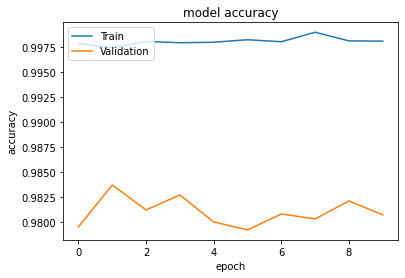

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

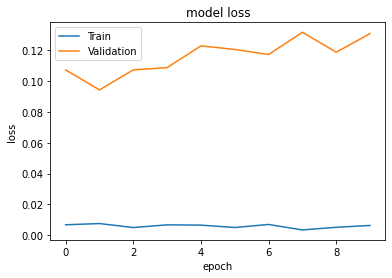

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()